In [318]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [319]:
# Load dataset
file_path = '/kaggle/input/titanic/train.csv'
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

Dataset Shape: (891, 12)

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [320]:
# Check for missing values
missing_values = df.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [321]:
train_data = df

# For "Age" column, fill missing values with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# For "Embarked" column, fill missing values with the most frequent category (mode)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


# Display all columns
pd.set_option('display.max_columns', None)

# Display first few rows
display(train_data.head())

# Summary statistics
display(train_data.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [322]:
# Display all columns
pd.set_option('display.max_columns', None)

# Display first few rows
display(df.head())

# Summary statistics
display(df.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


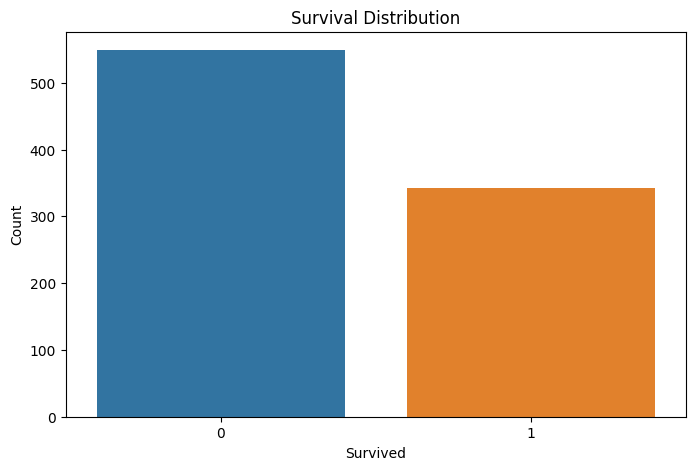

In [323]:
# Plot histogram for Survival
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived')
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

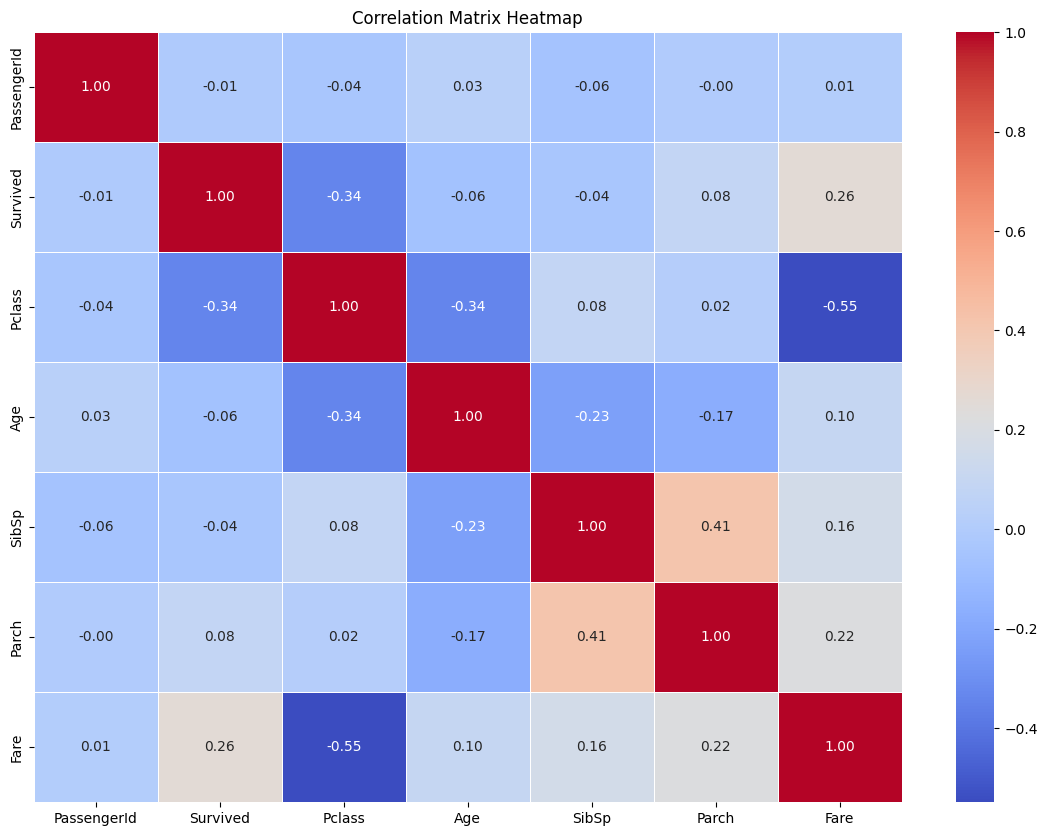

In [324]:
# Compute correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [325]:
# Section 3: Drop Unnecessary Columns
drop_columns = ["PassengerId", "Name", "Ticket", "Fare"]  # These columns are not useful for prediction
train_data.drop(columns=drop_columns, inplace=True)

print(train_data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch Cabin Embarked
0         0       3    male  22.0      1      0   NaN        S
1         1       1  female  38.0      1      0   C85        C
2         1       3  female  26.0      0      0   NaN        S
3         1       1  female  35.0      1      0  C123        S
4         0       3    male  35.0      0      0   NaN        S


In [326]:
#Converting strings to numerical values

train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})

train_data = pd.get_dummies(train_data, columns=["Embarked"])

#train_data["Embarked"] = train_data["Embarked"].map({"C":0, "Q":1, "S":2})

# Fill missing values in "Cabin" with "U" (Unknown)
train_data["Cabin"] = train_data["Cabin"].fillna("U")

# Extract first letter (deck) from Cabin
train_data["Deck"] = train_data["Cabin"].str[0]

# Drop the original "Cabin" column
train_data.drop(columns=["Cabin"], inplace=True)

# Convert "Deck" into dummy variables
train_data = pd.get_dummies(train_data, columns=["Deck"])

print(train_data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0       False       False   
1         1       1    1  38.0      1      0        True       False   
2         1       3    1  26.0      0      0       False       False   
3         1       1    1  35.0      1      0       False       False   
4         0       3    0  35.0      0      0       False       False   

   Embarked_S  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  \
0        True   False   False   False   False   False   False   False   False   
1       False   False   False    True   False   False   False   False   False   
2        True   False   False   False   False   False   False   False   False   
3        True   False   False    True   False   False   False   False   False   
4        True   False   False   False   False   False   False   False   False   

   Deck_U  
0    True  
1   False  
2    True  
3   False  
4    True  


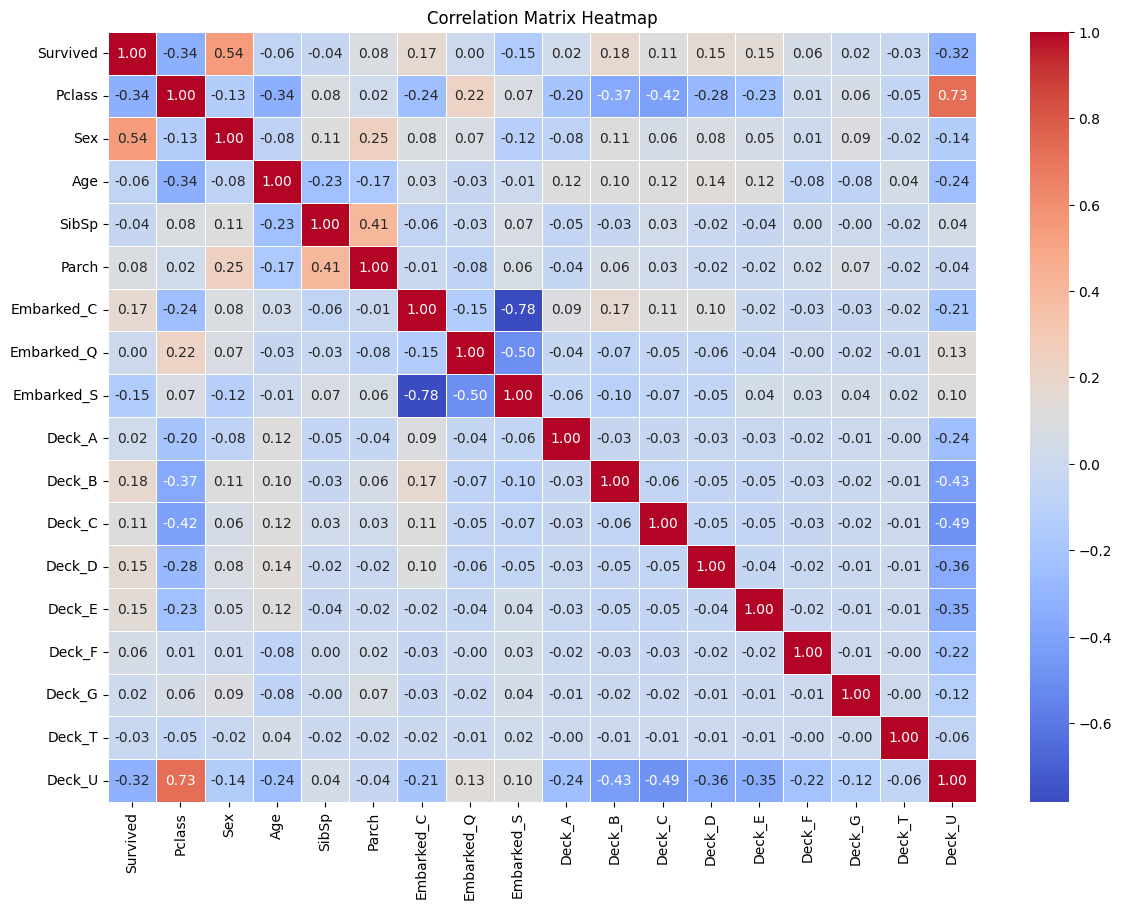

In [327]:
#Recalculate the correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [328]:
# Define features and target variable
X = train_data.drop(columns=["Survived"])  # Features
y = train_data["Survived"]  # Target variable

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [330]:
# Make predictions on the validation set
y_pred = dt_model.predict(X_val)

# Compute accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Decision Tree Accuracy: 0.7709

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       105
           1       0.75      0.66      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



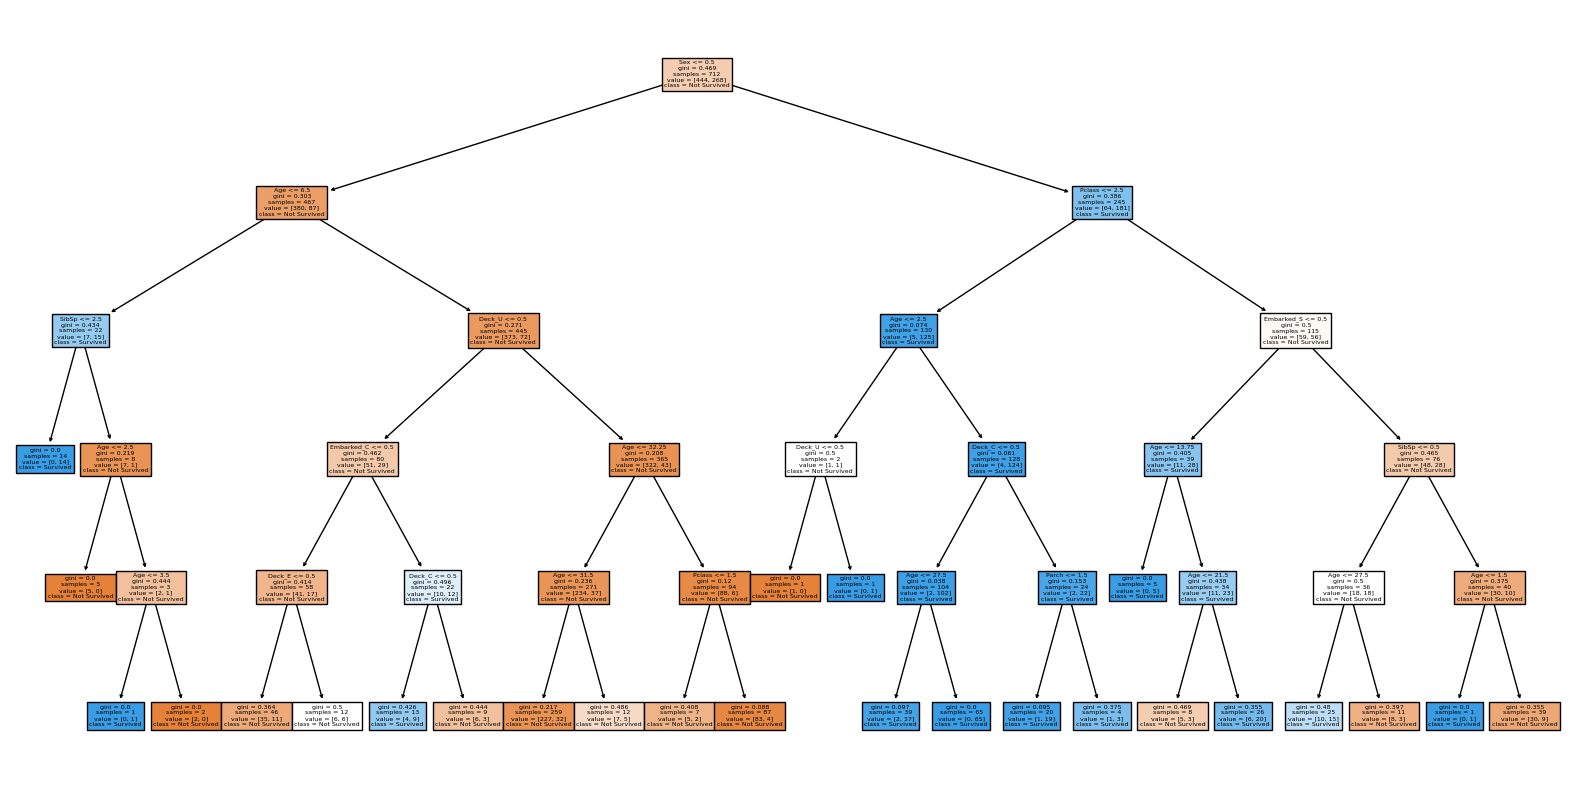

In [331]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

In [332]:
# Section 5: Train the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = train_data.drop(columns=["Survived"])  # Features
y = train_data["Survived"]  # Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=200, solver='liblinear')  # Using 'liblinear' for better small dataset performance
log_reg.fit(X_train, y_train)

# Predict on validation set
y_pred = log_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("\nLogistic Regression Accuracy on Validation Set:", accuracy)

# Train on the full dataset before testing
log_reg.fit(X, y)

print("\nFinal Logistic Regression model trained on the full dataset.")


Logistic Regression Accuracy on Validation Set: 0.8156424581005587

Final Logistic Regression model trained on the full dataset.


In [333]:
# Section 6: Preprocess Test Data for Prediction

# Load test data again
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# For "Age" column, fill missing values with the median
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# For "Embarked" column, fill missing values with the most frequent category (mode)
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# Drop unnecessary columns
drop_columns = ["PassengerId", "Name", "Ticket"]
test_data.drop(columns=drop_columns, inplace=True)

# Convert categorical variables
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data = pd.get_dummies(test_data, columns=["Embarked"])

# Ensure test data has the same columns as training data
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Add missing columns with default value 0

test_data = test_data[X.columns]  # Reorder columns to match training data

print("\nFinal Test Data Shape:", test_data.shape)
print("Final Test Data Preview:\n", test_data.head())



Final Test Data Shape: (418, 17)
Final Test Data Preview:
    Pclass  Sex   Age  SibSp  Parch  Embarked_C  Embarked_Q  Embarked_S  \
0       3    0  34.5      0      0       False        True       False   
1       3    1  47.0      1      0       False       False        True   
2       2    0  62.0      0      0       False        True       False   
3       3    0  27.0      0      0       False       False        True   
4       3    1  22.0      1      1       False       False        True   

   Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  
0       0       0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       0       0       0  
2       0       0       0       0       0       0       0       0       0  
3       0       0       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0       0       0  


In [334]:
# Section 7: Generate Predictions and Save Submission

# Predict survival on the test dataset
test_predictions = log_reg.predict(test_data)

# Load original test data again to get PassengerId
original_test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Create submission dataframe
submission = pd.DataFrame({"PassengerId": original_test_data["PassengerId"], "Survived": test_predictions})

# Save to CSV file
submission.to_csv("submission.csv", index=False)

print("\nSubmission file 'submission.csv' successfully saved!")


Submission file 'submission.csv' successfully saved!


In [335]:
#Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grids
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV (faster than GridSearchCV)
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=10,  # Number of different combinations to try
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=2, 
    n_jobs=-1
)

# Run the random search
random_search.fit(X_train, y_train)

# Display the best parameters found
print("\nBest Parameters from RandomizedSearchCV:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5}


In [336]:
# Step 2: Fine-Tune with GridSearchCV

# Narrowing down based on RandomizedSearchCV results
best_params = random_search.best_params_

# Ensure n_estimators is always at least 1
n_estimators_values = [
    max(1, best_params['n_estimators'] - 50),
    best_params['n_estimators'],
    best_params['n_estimators'] + 50
]

# Define refined hyperparameter grid for GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid={ 
        'n_estimators': n_estimators_values,
        'max_depth': [best_params['max_depth']],
        'min_samples_split': [best_params['min_samples_split']],
        'min_samples_leaf': [best_params['min_samples_leaf']]
    },
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters from GridSearchCV
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters from GridSearchCV: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [337]:
# Train the best model using optimal hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X, y)

print("\nFinal Random Forest model trained with best hyperparameters.")


Final Random Forest model trained with best hyperparameters.


In [338]:
print(test_data.columns)

# Define features and target for the training data
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Embarked_Q", "Embarked_C", "Embarked_S", "Deck_A" , "Deck_B",  "Deck_C",  "Deck_D" ,"Deck_E" , "Deck_F",  "Deck_G",  "Deck_T",  "Deck_U"]

# Prepare the training data
X_train = pd.get_dummies(train_data[features], drop_first=True)
y_train = train_data["Survived"]

# Prepare the test data
X_test = pd.get_dummies(test_data[features], drop_first=True)

# Align the columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


## Predict on the test set
test_predictions = best_rf.predict(test_data)

# Compute accuracy on validation set
y_pred_val = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)

print(f"Validation Set Accuracy: {val_accuracy:.4f}")

# Now train the model with the best hyperparameters
best_rf.fit(X_train, y_train)

# Test the model on the test data
y_pred_rf = best_rf.predict(X_test)

original_test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Create a submission file
output = pd.DataFrame({"PassengerId": original_test_data["PassengerId"], "Survived": y_pred_rf})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')
Validation Set Accuracy: 0.8380
Your submission was successfully saved!


In [339]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924
Your submission was successfully saved!
